In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [13]:
titanic = pd.read_csv("train.csv", index_col=0)
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S


In [14]:
# Y is the target variable
Y = titanic['Survived']
# X is the feature set which includes
X = titanic[['Fare','Pclass']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 111)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 712
The number of observations in test set is 179


In [17]:
titanic_prediction_model = LogisticRegression()
titanic_prediction_model.fit(X_train, y_train)

train_prediction = titanic_prediction_model.predict(X_train)
test_prediction = titanic_prediction_model.predict(X_test)

test_prediction_probability = titanic_prediction_model.predict_proba(X_test)[:,1]

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train, train_prediction)
confusion_matrix_test = confusion_matrix(y_test, test_prediction)

In [21]:
print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[373  63]
 [168 108]]


Confusion Matrix (Test Data)
------------------------------
[[96 17]
 [38 28]]


In [22]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 96
True positive amount  : 28
False positive amount : 17
False negative amount : 38


In [23]:
from sklearn.metrics import accuracy_score

print("Accuracy value by the model   : ",  titanic_prediction_model.score(X_test, y_test))
print("Calculated accuracy value     : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() value        : ",  accuracy_score(y_test, test_prediction))

Accuracy value by the model   :  0.6927374301675978
Calculated accuracy value     :  0.6927374301675978
accuracy_score() value        :  0.6927374301675978


In [24]:
from sklearn.metrics import precision_score

print("Calculated precision value   : ",  (TP)/(FP + TP))
print("precision_score() value      : ",  precision_score(y_test, test_prediction))

Calculated precision value   :  0.6222222222222222
precision_score() value      :  0.6222222222222222


In [25]:
from sklearn.metrics import recall_score

print("Calculated recall value   : ",  (TP)/(TP + FN))
print("recall_score() value      : ",  recall_score(y_test, test_prediction))

Calculated recall value   :  0.42424242424242425
recall_score() value      :  0.42424242424242425


In [26]:
print("Calculated specificity value   : ",  (TN)/(TN + FP))


Calculated specificity value   :  0.8495575221238938


In [27]:
from sklearn.metrics import f1_score

precision = precision_score(y_test, test_prediction)
recall = recall_score(y_test, test_prediction)


print("Calculated F1 score  : ",  2*((recall*precision)/(recall + precision)))
print("f1_score() value     : ",  f1_score(y_test, test_prediction))

Calculated F1 score  :  0.5045045045045045
f1_score() value     :  0.5045045045045045


In [28]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test, test_prediction))

print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       113
           1       0.62      0.42      0.50        66

    accuracy                           0.69       179
   macro avg       0.67      0.64      0.64       179
weighted avg       0.68      0.69      0.68       179

f1_score() value        : 0.50
recall_score() value    : 0.42
precision_score() value : 0.62


Precision  : [0.71641791 0.62222222]
Recall     : [0.84955752 0.42424242]
F1 Score   : [0.77732794 0.5045045 ]


In [29]:
test_prediction_proba = titanic_prediction_model.predict_proba(X_test)[:,1]

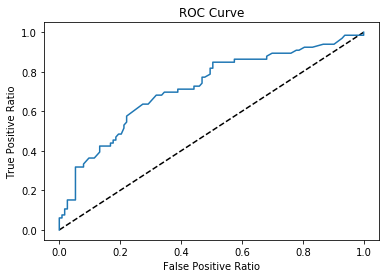

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

In [31]:
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

AUC value :  0.7184231697506033


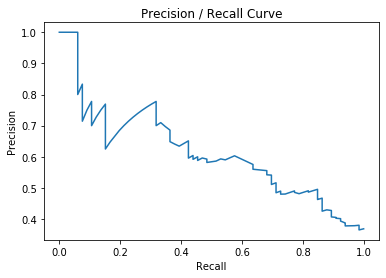

In [32]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, test_prediction_proba)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve')

plt.show()

In [33]:
from sklearn.metrics import log_loss

print("Logarithmic Loss (log-loss) : " , log_loss(y_test, test_prediction_proba))
print("Error Rate                  : " , 1- accuracy_score(y_test, test_prediction))

Logarithmic Loss (log-loss) :  0.5887855979293491
Error Rate                  :  0.3072625698324022


In [ ]:
# Accuracy value by our model is 0.69 the ratio of those classified truely to the total number.
# precision value by our model is 0.62 how much of the data points estimated to be positive is really positive. 
# recall score value by our model is 0.42 how much of actual positive values are predicted as positive.
# Calculated specificity value by our model is 0.84 It is how much of actual negative values are predicted as negative.
# f1_score value by our model is 0.50 the harmonic mean of precision and recall values
# AUC value by our model is 0.71 
# Logarithmic Loss by our model is 0.5887855979293491
# Error Rate by our model is 0.3072625698324022 the ratio of those misclassified to the total number.

# The calculated values show us our model is not so bad, and f1 score is 0,50 and it means our model is in balance.

In [ ]:
# the ROC and the precision / recall curves for "c" value 0.001

In [35]:
lr = LogisticRegression(penalty = 'l2', C = 0.001, random_state = 0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

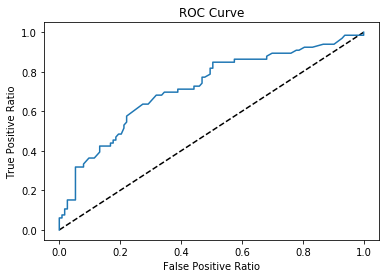

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, test_prediction_proba)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve')

plt.show()